In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import math
import numpy as np

In [2]:
'''
显示图片
输入：图片矩阵，画布大小：元组（宽，高）
'''
def showImg(img,figsize=(12,12),cmap = None):
    plt.figure(figsize=figsize)
    plt.axis('off')
    plt.imshow(img,cmap = cmap)
    plt.show()

In [3]:
img = cv.imread("./imgs/bg.PNG",1)

In [4]:
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

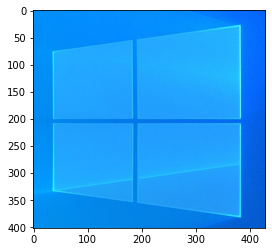

In [5]:
plt.imshow(img)

### 绘制椭圆

In [8]:
center1 = (int(img.shape[1]/2),int(img.shape[0]/2))
ellipse_axis1 = (int(img.shape[1]/8),int(img.shape[0]/10))
angle1 = 30
center2 = (int(img.shape[1]/2)+5,int(img.shape[0]/2)
           
           +8)
ellipse_axis2 = (int(img.shape[1]/4),int(img.shape[0]/5))
angle2 = 35

In [9]:
img = cv.ellipse(img,center1,ellipse_axis1,30,0,360,(0,0,0),3) 
img = cv.ellipse(img,center2,ellipse_axis2,35,0,360,(255,0,0),3) 
#angle：椭圆沿水平方向逆时针旋转的角度
#startAngle：沿长轴顺时针方向开始显示的角度
#endAngle：沿长轴顺时针结束显示的角度

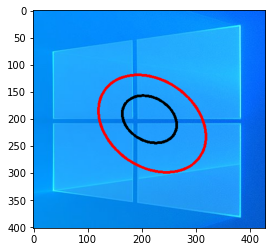

In [10]:
plt.imshow(img)

In [11]:
'''
func: 获取椭圆的两个顶点 长轴交点 短轴交点
input：长轴与水平轴逆时针旋转角度 圆心的坐标 轴长度信息（长轴 短轴）
return：长轴交点 短轴交点
'''
def getEllipseTwoPoint(angle,center,ellipse_axis):
    angle1 = angle*math.pi/180  #求解sin等需要弧度值
    angle2 = (angle+90)*math.pi/180  #求解sin等需要弧度值
    p1 = center[0]+ellipse_axis[0]*math.cos(angle1)
    p2 = center[1]+ellipse_axis[0]*math.sin(angle1)
    lenPoint = (int(p1),int(p2))
    p3 = center[0]+ellipse_axis[1]*math.cos(angle2)
    p4 = center[1]+ellipse_axis[1]*math.sin(angle2)
    Point1 = [p1,p2]
    Point2 = [p3,p4]
    return Point1,Point2

In [12]:
'''
func: 通过椭圆的信息 得到对应圆的对应点
input：长轴与水平轴逆时针旋转角度 圆心的坐标 轴长度信息（长轴 短轴）
return：长，短轴交点对应的顶点
'''
def getCircleTwoPoint(angle,center,ellipse_axis):
    angle1 = angle*math.pi/180  #求解sin等需要弧度值
    angle2 = (angle+90)*math.pi/180  #求解sin等需要弧度值
    radius = ellipse_axis[0]
    p1 = center[0]+radius*math.cos(angle1)
    p2 = center[1]+radius*math.sin(angle1)
    lenPoint = (int(p1),int(p2))
    p3 = center[0]+radius*math.cos(angle2)
    p4 = center[1]+radius*math.sin(angle2)
    Point1 = [p1,p2]
    Point2 = [p3,p4]
    return Point1,Point2

In [13]:
'''
func:对图像进行仿射变换进行矫正-》 椭圆变换为圆 
input：图像 旋转角度 圆心 椭圆的长短轴信息
return：返回矫正后的图像
'''
def ellipseRevise(img,angle,center,ellipse_axis):
    plen,pshort = getEllipseTwoPoint(angle,center,ellipse_axis)
    Cplen,Cpshort = getCircleTwoPoint(angle,center,ellipse_axis)
    ellipse_set = np.float32([list(center1),plen,pshort])
    circle_set = np.float32([list(center1),Cplen,Cpshort])
    M = cv.getAffineTransform(ellipse_set,circle_set)
    dst = cv.warpAffine(img,M,(img.shape[1],img.shape[0]))
    return dst

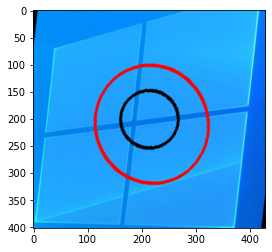

In [21]:
dst1 = ellipseRevise(img,angle1,center1,ellipse_axis1)
plt.imshow(dst1)

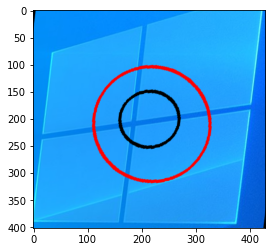

In [22]:
dst2 = ellipseRevise(img,angle2,center2,ellipse_axis2)
plt.imshow(dst2)

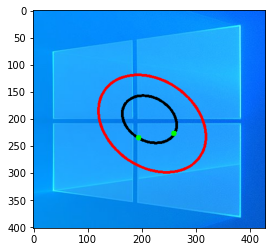

In [21]:
# plen,pshort = getTwoPoint(angle1,center1,ellipse_axis1)
# Cimg = img.copy()
# imgtemp = cv.circle(Cimg, plen, 5,(0,255,0), -1)
# imgtemp = cv.circle(Cimg, pshort, 5,(0,255,0), -1)
# plt.imshow(imgtemp)